# Portfolio Optimization Project, MATH 441
$$\underline{\text{Dylan Liong, Thomas Sun, Allen Cho}}$$

TO DO:
* review/improve background information on portfolio optimization, give more context, find history, find historical ways ppl split their portfolio, elaborate on the markowitz model 
* talk about a more specific type of equity: index fund? mutual fund? hedge fund?
* detail more about obj function, constraints
* explain what is quadratic programming
* explain how QPsolver works
* find another solver/ write our program?
* help simplify the code that we have, it works but maybe make it more useable, maybe a function
* help make a function that generates both returns and geom at the same time
* a simple two assets example (using CAN returns) (done)
* a simple three assets example (using CAN returns) (done) 
* a complex three assets example (maybe S&P vs bonds vs cash?)
* a complex 10 assets example (10 US stocks?)
* a personal example (we use the stocks we personally have, run algorithm on them) 

## Introduction

A portfolio is a collection of financial instruments, such as stocks, bonds, cash, commodities, etc. Portfolio managers have one goal in mind: maximizing returns. Diversification (not putting all eggs in the same basket) is a key concept in portfolio management to reduce risks. It aims to maximize returns by investing in different areas that would each react differently to the same event. 

The most popular portfolio optimization model is the Marry Markowitz model (HM), which assists in the selection of the most efficient portfolio by analyzing various possible portfolios of the given securities. It basically means that we create N amount of portfolios, with different weights assigned to each asset, and the model should determine the set of most efficient portfolios (Efficient Frontier EF). 
The HM model is called the **mean-variance model** because it is based on expected returns (mean) and standard deviation (variance) of the various portfolios. 

A **mean-variance optimization (MVO)** problem can be formulated in two ways: 

* Maximizing return for a given risk
* Minimizing risk for a given return

Once we have the portfolio efficient frontier, the investor still needs to select the portfolio he/she wants. The decision is based on a set of indifference curves, and we could rationally find the most optimal portfolio. We will provide further explanations during the analysis.

## Problem Statement

**Our goal**: Provide an algorithm, that takes returns of assets, to obtain the efficient portfolio frontier using the MVO model. From the EF, we will provide results analysis and find the optimal portfolio.

**Sub-questions**:
* what is portfolio optimization?
* how does the Markowitz model work?
* what are the objective function and constraints?
* what data needs to be gathered?
* what is the most simple example?
* what is Quadratic Programming?

## Basic Theory

Consider different securities, with random returns. For each security, $i = 1,...,n$ estimates, we have **expected returns $\mu_{i}$**, **variance $\sigma_{i}^{2}$**, and **correlation coeffcient $\rho_{ij}$** for securities $i$ and $j$.
We can represent the proportion (weight) of the total funds invested in security $i$ by $x_i$. We can compute the expected return and the variance of the resulting portfolio $x = (x_1,...,x_n)$:
* $E[x] = x_1 \mu_{1} + ... + x_n \mu_{n} = \mu^T x$
* $Var[x] = \sum_{i,j} \rho_{ij} \sigma_{i} \sigma_{j} x_i x_j = x^T Qx$ \
where $Q_{ij} = \rho_{ij} \sigma_{i} \sigma_{j}$ and $\mu = (\mu_{1},...,\mu_{n})$, and the portfolio vector $x$ must satisfy $\sum_{i} x_i = 1$ 

A feasible portfolio $x$ is called **efficient** if it has (A) the minimum variance among all portfolios that have at least a certain expected return, OR, has (B) the maximal expected return among all portfolios with the same variance. The collection of all efficient portfolios generate the **efficient frontier**.

## Data and Computation

The formulation above produces a convex quadratic programming problem:

* (A) Minimizing Variance
$$
min_x \space x^T Qx \\ 
e^T x = 1  \\
\mu^{T} x \geq R \\
x \geq 0
$$

* (B) Maximizing Returns
$$
max_x \space \mu^{T} \\
e^T x = 1  \\
x^T Qx \leq V \\
x \geq 0
$$

For (A):
* first constraint: assuring that $\sum_{i} x_i = 1$ 
* second constraint: indicates that the expected return is no less than a target value $R$, ranging between $R_{min}$ and $R_{max}$ to obtain all the efficient portfolios.

For (B):
* first constraint: assuring that $\sum_{i} x_i = 1$ 
* second constraint: indicates that the variance has an upper limit V on the portfolio.

-> The only set of data that we need is the historal return for asset classes (stocks, bonds, money, etc) to estimate their future expected returns. However, from this set of data we need to compute, for asset $A_i$:
* rates of returns
* mean rates of returns
* variance 
* covariance
* correlation 

-> For a two-asset portfolio A and B:
* portfolio return: $E(R_p)= \delta E(R_A) + (1 - \delta) E(R_B) $
* portfolio variance: $\sigma_{p}^2 = \delta^2 \sigma_{A}^2 + (1 - \delta)^2 \sigma_{B}^2 + 2 \delta (1-\delta) \rho_{AB} \sigma_{A} \sigma_{B}$ \
$\delta$ being the weight on asset A

## Outline of the project
1. background information about optimal portfolio 
2. data gathering
3. building a simple 2-asset optimal portfolio problem, solved manually and numerically
4. building a robust 3-asset optimal portfolio problem
5. building a robust multi-stock optimal portfolio problem
6. interpretation and results 
7. experimentation with the built algorithm

## Reference

* https://en.wikipedia.org/wiki/Markowitz_model 
* https://www.investopedia.com/terms/p/portfolio.asp 
* https://en.wikipedia.org/wiki/Quadratic_programming 
* https://vanderbei.princeton.edu/542/lectures/lec17.pdf 
* Lecture notes from my ECON 490 class

In [1]:
pip install qpsolvers[open_source_solvers]

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import math
import matplotlib.pyplot as plt
from qpsolvers import solve_qp

In [3]:
R = 0.05
P = np.array([[0.031366,0.0011772],[0.0011772,0.0014296]])
q = np.array([[0,0],[0,0]])
G = np.array([0.036968770, 0.007736639])
h = np.array([R])
A = np.array([1., 1.])
b = np.array([1.])

x = solve_qp(P, q, G, h, A, b, solver="osqp")
print("QP solution: x = {}".format(x))

QP solution: x = [0.00837217 0.9913202 ]


/opt/conda/lib/python3.10/site-packages/qpsolvers/solvers/conversions/warnings.py:35: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warn(
/opt/conda/lib/python3.10/site-packages/qpsolvers/solvers/conversions/warnings.py:35: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warn(


In [4]:
P = np.array([[0.02778,0.00387,0.00021],
              [0.00387,0.01112,-0.00020],
              [0.00021,-0.00020,0.00115]])
q = np.array([[0,0,0],[0,0,0],[0,0,0]])
G = np.array([0.1073,0.0737,0.0627])
h = np.array([0.105])
A = np.array([1.,1.,1.])
b = np.array([1.])
lb = np.array([0.,0.,0.])
x = (solve_qp(P, q, -G, -h, A, b, lb, solver="osqp").round(2))
print("QP solution: x = {}".format(x))

QP solution: x = [0.93 0.07 0.  ]


In [5]:
z = []
for R in np.arange(0.065,0.110,0.005):
    P = np.array([[0.02778,0.00387,0.00021],
              [0.00387,0.01112,-0.00020],
              [0.00021,-0.00020,0.00115]])
    q = np.array([[0,0,0],[0,0,0],[0,0,0]])
    G = np.array([0.1073,0.0737,0.0627])
    h = np.array([R])
    A = np.array([1.,1.,1.])
    b = np.array([1.])
    lb = np.array([0.,0.,0.])
    x = (solve_qp(P, q, -G, -h, A, b, lb, solver="osqp").round(2))
    z.append(x)
    #print("QP solution: x = {}".format(x))
q = np.array(z)
print(q)

[[ 0.02  0.15  0.82]
 [ 0.13  0.15  0.72]
 [ 0.23  0.17  0.6 ]
 [ 0.34  0.18  0.48]
 [ 0.45  0.19  0.35]
 [ 0.57  0.2   0.23]
 [ 0.69  0.2   0.11]
 [ 0.78  0.22 -0.  ]
 [ 0.93  0.07  0.  ]]


In [6]:
for R in np.arange(-0.030,0.015,0.005):
    P = np.array([[0.003207,0.005219],
                  [0.005219,0.075775]])
    q = np.array([[0,0],[0,0]])
    G = np.array([-0.030628,0.01569])
    h = np.array([R])
    A = np.array([1.,1.])
    b = np.array([1.])
    lb = np.array([0.,0.])
    x = (solve_qp(P, q, -G, -h, A, b, lb, solver="osqp").round(2))
    print("QP solution: x = {}".format(x))

QP solution: x = [0.99 0.01]
QP solution: x = [0.88 0.12]
QP solution: x = [0.77 0.23]
QP solution: x = [0.66 0.34]
QP solution: x = [0.55 0.45]
QP solution: x = [0.45 0.55]
QP solution: x = [0.34 0.66]
QP solution: x = [0.23 0.77]
QP solution: x = [0.12 0.88]


------

Trying to replicate the results from R

In [7]:
df1 = pd.read_csv('textbook.csv')

In [8]:
df1 = df1[['stocks', 'bonds', 'MM']]

In [9]:
df1 = df1.div(100)

In [10]:
df1

,stocks,bonds,MM
0,0.2681,0.0220,0.0233
1,-0.0878,0.0572,0.0293
2,0.2269,0.0179,0.0338
3,0.1636,0.0371,0.0385
4,0.1236,0.0093,0.0432
5,-0.1010,0.0512,0.0540
6,0.2394,-0.0286,0.0451
7,0.1100,0.0225,0.0602
8,-0.0847,-0.0563,0.0897
9,0.0394,0.1892,0.0490


In [11]:
variance = df1.iloc[:,0:3].var()
round(variance,5)

stocks    0.02839
bonds     0.01148
MM        0.00118
dtype: float64

In [12]:
covariance = df1.iloc[:,0:3].cov()
round(covariance,5)

,stocks,bonds,MM
stocks,0.02839,0.00389,0.00021
bonds,0.00389,0.01148,-0.00024
MM,0.00021,-0.00024,0.00118


In [13]:
stocks = df1['stocks']
bonds = df1['bonds']
MM = df1['MM']

In [14]:
var_stocks = stocks.var()
var_bonds = bonds.var()
var_MM = MM.var()

cor_stocks_bonds = (stocks.corr(bonds))
cor_stocks_MM = (stocks.corr(MM))
cor_bonds_MM = (bonds.corr(MM))

In [15]:
#for(i in 1:43) {       
#  geom_mean1 = ((1+stocks[i]/100)*geom_mean1)
#  lols1 = abs(geom_mean1)^(1/43) -1 

In [16]:
geom_mean1 = 1
geom_mean2 = 1
geom_mean3 = 1

for i in range(0,43):
    geom_mean1 = ((1+stocks[i])*geom_mean1)
    lols1 = (abs(geom_mean1)**(1/43) -1)*100
    
for i in range(0,43):
    geom_mean2 = ((1+bonds[i])*geom_mean2)
    lols2 = (abs(geom_mean2)**(1/43) -1)*100
    
for i in range(0,43):
    geom_mean3 = ((1+MM[i])*geom_mean3)
    lols3 = (abs(geom_mean3)**(1/43) -1)*100

In [17]:
print(round(lols1,5),
      round(lols2,5),
      round(lols3,5))

10.72126 7.30468 6.27013


In [18]:
var_r0065 = (0.03**2 * var_stocks + 0.10**2 * var_bonds + 0.87**2 * var_MM 
                + 2*0.03*0.10*cor_stocks_bonds*math.sqrt(var_stocks)*math.sqrt(var_bonds) 
                + 2*0.03*0.87*cor_stocks_MM*math.sqrt(var_stocks)*math.sqrt(var_MM) 
                + 2*0.10*0.87*cor_bonds_MM*math.sqrt(var_bonds)*math.sqrt(var_MM))

var_r0070 = (0.13**2 * var_stocks + 0.12**2 * var_bonds + 0.75**2 * var_MM 
                + 2*0.13*0.12*cor_stocks_bonds*math.sqrt(var_stocks)*math.sqrt(var_bonds) 
                + 2*0.13*0.75*cor_stocks_MM*math.sqrt(var_stocks)*math.sqrt(var_MM) 
                + 2*0.12*0.75*cor_bonds_MM*math.sqrt(var_bonds)*math.sqrt(var_MM))

var_r0075 = (0.24**2 * var_stocks + 0.14**2 * var_bonds + 0.62**2 * var_MM 
                + 2*0.24*0.14*cor_stocks_bonds*math.sqrt(var_stocks)*math.sqrt(var_bonds) 
                + 2*0.24*0.62*cor_stocks_MM*math.sqrt(var_stocks)*math.sqrt(var_MM) 
                + 2*0.14*0.62*cor_bonds_MM*math.sqrt(var_bonds)*math.sqrt(var_MM))

var_r0080 = (0.35**2 * var_stocks + 0.16**2 * var_bonds + 0.49**2 * var_MM 
                + 2*0.35*0.16*cor_stocks_bonds*math.sqrt(var_stocks)*math.sqrt(var_bonds) 
                + 2*0.35*0.49*cor_stocks_MM*math.sqrt(var_stocks)*math.sqrt(var_MM) 
                + 2*0.16*0.49*cor_bonds_MM*math.sqrt(var_bonds)*math.sqrt(var_MM))

var_r0085 = (0.45**2 * var_stocks + 0.18**2 * var_bonds + 0.37**2 * var_MM 
                + 2*0.45*0.18*cor_stocks_bonds*math.sqrt(var_stocks)*math.sqrt(var_bonds) 
                + 2*0.45*0.37*cor_stocks_MM*math.sqrt(var_stocks)*math.sqrt(var_MM) 
                + 2*0.18*0.37*cor_bonds_MM*math.sqrt(var_bonds)*math.sqrt(var_MM))

var_r0090 = (0.56**2 * var_stocks + 0.20**2 * var_bonds + 0.24**2 * var_MM 
                + 2*0.56*0.20*cor_stocks_bonds*math.sqrt(var_stocks)*math.sqrt(var_bonds) 
                + 2*0.56*0.24*cor_stocks_MM*math.sqrt(var_stocks)*math.sqrt(var_MM) 
                + 2*0.20*0.24*cor_bonds_MM*math.sqrt(var_bonds)*math.sqrt(var_MM))

var_r0095 = (0.67**2 * var_stocks + 0.22**2 * var_bonds + 0.11**2 * var_MM 
                + 2*0.67*0.22*cor_stocks_bonds*math.sqrt(var_stocks)*math.sqrt(var_bonds) 
                + 2*0.67*0.11*cor_stocks_MM*math.sqrt(var_stocks)*math.sqrt(var_MM) 
                + 2*0.22*0.11*cor_bonds_MM*math.sqrt(var_bonds)*math.sqrt(var_MM))

var_r0100 = (0.78**2 * var_stocks + 0.22**2 * var_bonds + 0**2 * var_MM 
                + 2*0.78*0.22*cor_stocks_bonds*math.sqrt(var_stocks)*math.sqrt(var_bonds) 
                + 2*0.78*0*cor_stocks_MM*math.sqrt(var_stocks)*math.sqrt(var_MM) 
                + 2*0.22*0*cor_bonds_MM*math.sqrt(var_bonds)*math.sqrt(var_MM))

var_r0105 = (0.93**2 * var_stocks + 0.07**2 * var_bonds + 0**2 * var_MM 
                + 2*0.93*0.07*cor_stocks_bonds*math.sqrt(var_stocks)*math.sqrt(var_bonds) 
                + 2*0.93*0*cor_stocks_MM*math.sqrt(var_stocks)*math.sqrt(var_MM) 
                + 2*0.07*0*cor_bonds_MM*math.sqrt(var_bonds)*math.sqrt(var_MM))

In [19]:
variances = np.array([round(var_r0065,6),round(var_r0070,6),round(var_r0075,6),
                      round(var_r0080,6),round(var_r0085,6),round(var_r0090,6),
                      round(var_r0095,6),round(var_r0100,6),round(var_r0105,6)])
variances

array([0.001026, 0.001428, 0.002595, 0.004524, 0.00695 , 0.010334,
       0.014479, 0.019163, 0.025118])

In [20]:
returns = np.array([0.065,0.070,0.075,0.080,0.085,0.090,0.095,0.1,0.105])
returns

array([0.065, 0.07 , 0.075, 0.08 , 0.085, 0.09 , 0.095, 0.1  , 0.105])

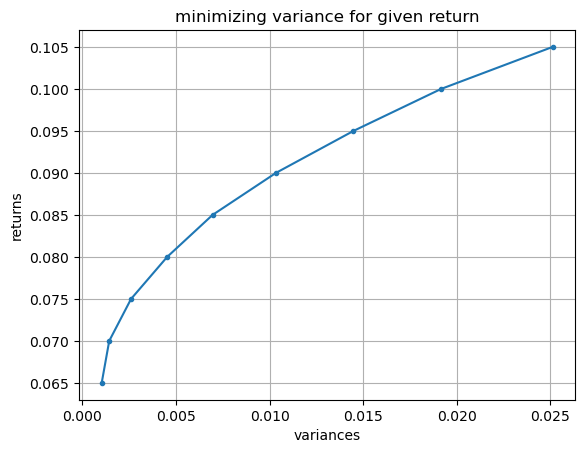

In [21]:
t = variances
s = returns

fig, ax = plt.subplots()
ax.plot(t, s, marker='.')

ax.set(xlabel='variances', ylabel='returns',
       title='minimizing variance for given return')
ax.grid()

fig.savefig("test.png")
plt.show()

In [22]:
df_results = {'Returns': returns, 'Variances': variances, 'Weight': z}
pd.DataFrame(df_results)

,Returns,Variances,Weight
0,0.065,0.001026,"[0.02, 0.15, 0.82]"
1,0.070,0.001428,"[0.13, 0.15, 0.72]"
2,0.075,0.002595,"[0.23, 0.17, 0.6]"
3,0.080,0.004524,"[0.34, 0.18, 0.48]"
4,0.085,0.006950,"[0.45, 0.19, 0.35]"
5,0.090,0.010334,"[0.57, 0.2, 0.23]"
6,0.095,0.014479,"[0.69, 0.2, 0.11]"
7,0.100,0.019163,"[0.78, 0.22, -0.0]"
8,0.105,0.025118,"[0.93, 0.07, 0.0]"


In [23]:
q = np.array(z)

In [24]:
q[:,0]

array([0.02, 0.13, 0.23, 0.34, 0.45, 0.57, 0.69, 0.78, 0.93])

In [25]:
df_results = {'Returns': returns, 'Variances': variances,
              'stocks': q[:,0], 'bonds': q[:,1], 'MM': q[:,2]}
pd.DataFrame(df_results)

,Returns,Variances,stocks,bonds,MM
0,0.065,0.001026,0.02,0.15,0.82
1,0.070,0.001428,0.13,0.15,0.72
2,0.075,0.002595,0.23,0.17,0.60
3,0.080,0.004524,0.34,0.18,0.48
4,0.085,0.006950,0.45,0.19,0.35
5,0.090,0.010334,0.57,0.20,0.23
6,0.095,0.014479,0.69,0.20,0.11
7,0.100,0.019163,0.78,0.22,-0.00
8,0.105,0.025118,0.93,0.07,0.00


----

simple example, 2x2 asset (r2 and r3)

In [26]:
df2 = pd.read_csv('lab1.csv')
df2 = df2.iloc[:,2:4]
df2

,r2,r3
0,0.009847,0.174599
1,0.024378,-0.009988
2,-0.000498,-0.007566
3,-0.045183,0.081067
4,0.017397,0.031877
...,...,...
56,-0.036920,-0.044000
57,-0.025030,-0.121339
58,-0.002837,-0.358852
59,-0.027131,-0.097015


In [27]:
r2 = df2['r2']
r3 = df2['r3']
var_r2 = r2.var()           #need later to calc var per R 
var_r3 = r3.var()
cor_r2_r3 = (r2.corr(r3))

Calculating rates of returns 

In [28]:
r2_returns = []
r3_returns = []
for i in range(1,len(df2.index)):
    returnsr2 = (r2[i]-r2[i-1])/r2[i-1]
    r2_returns.append(round(returnsr2/100,5))
        
    returnsr3 = (r3[i]-r3[i-1])/r3[i-1]
    r3_returns.append(round(returnsr3/100,5))
        
print(r3_returns)

[-0.01057, -0.00242, -0.11715, -0.00607, 0.00256, -0.04, -0.01042, -0.22144, 0.00279, -0.00796, 0.02267, 0.01101, -0.02653, -0.01094, -0.00624, -0.15289, -0.01258, 0.01374, -0.01396, -0.03568, -0.00699, 0.02007, -0.00825, -0.10114, -0.01926, -0.02345, -0.00231, -0.00835, -0.05288, -0.00559, 0.00532, -0.00773, 0.09107, -0.01051, -0.0927, -0.01953, -0.0224, -0.00553, -0.03527, -0.01827, 0.00572, -0.03396, -0.00237, -0.01011, 0.29067, -0.01572, -0.02205, 0.05123, -0.00646, -0.00262, -0.03208, -0.02818, -0.01603, -0.01945, -0.02201, -0.01224, 0.01758, 0.01957, -0.0073, 0.02919]


Making a dataframe for rate_returns

In [29]:
r2_returns[59]=0
r3_returns[59]=0
df2_results = pd.DataFrame({'r2_returns': (r2_returns), 'r3_returns': (r3_returns)})

In [30]:
def geom_mean(n,r2_returns,r3_returns):
    geom_mean2 = 1
    geom_mean3 = 1
      
    for i in range(0,n):
        geom_mean2 = ((1+r2_returns[i])*geom_mean2)
        lols2 = (abs(geom_mean2)**(1/(n)) -1)*100
            
        geom_mean3 = ((1+r3_returns[i])*geom_mean3)
        lols3 = (abs(geom_mean3)**(1/(n)) -1)*100
        
    return(round(lols2,5),round(lols3,5))

In [31]:
n=59
geom_mean(n,r2_returns,r3_returns)

(1.35891, -1.51546)

In [32]:
covariance = df2_results.iloc[:,0:2].cov()
round(covariance,5)

,r2_returns,r3_returns
r2_returns,0.07575,-0.00114
r3_returns,-0.00114,0.00353


In [33]:
for R in np.arange(-0.010,0.0140,0.0025):
    P = np.array([[0.07575,-0.00114],
                  [-0.00114,0.00353]])
    q = np.array([[0,0],[0,0]])
    G = np.array([0.0135891,-0.0151546])
    h = np.array([R])
    A = np.array([1.,1.])
    b = np.array([1.])
    lb = np.array([0.,0.])
    x = (solve_qp(P, q, -G, -h, A, b, lb, solver="osqp").round(2))
    print("QP solution: x = {}".format(x))

QP solution: x = [0.18 0.82]
QP solution: x = [0.27 0.73]
QP solution: x = [0.35 0.65]
QP solution: x = [0.44 0.56]
QP solution: x = [0.53 0.47]
QP solution: x = [0.61 0.39]
QP solution: x = [0.7 0.3]
QP solution: x = [0.79 0.21]
QP solution: x = [0.88 0.12]
QP solution: x = [0.96 0.04]


/opt/conda/lib/python3.10/site-packages/qpsolvers/solvers/conversions/warnings.py:35: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warn(
/opt/conda/lib/python3.10/site-packages/qpsolvers/solvers/conversions/warnings.py:35: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warn(


------

[link for trying to make 2 functions in one](https://stackoverflow.com/questions/10139866/calling-variable-defined-inside-one-function-from-another-function)

In [34]:
#tried function inside of a function to get the geom mean directly from rate of returns 
def geom_mean(n,r1_returns,r2_returns):
    geom_mean1 = 1
    geom_mean2 = 1
    r1_returns = []
    r2_returns = []  
    
    for i in range(0,n+1):
        geom_mean1 = ((1+r1_returns[i])*geom_mean1)
        lols1 = (abs(geom_mean1)**(1/(n+1)) -1)*100
            
        geom_mean2 = ((1+r2_returns[i])*geom_mean2)
        lols2 = (abs(geom_mean2)**(1/(n+1)) -1)*100
        
    return(lols1,lols2)
    
    def lolipop(n,r1,r2):
        
        for i in range(1,n+1):
            returnsr1 = round((r1[i]-r1[i-1])/r1[i-1],5)
            r1_returns.append(returnsr1)
            
            returnsr2 = round((r2[i]-r2[i-1])/r2[i-1],5)
            r2_returns.append(returnsr2)  
            
        return(r1_returns,r2_returns)

----

simple example, 3x3 assets (r4,r5,r6)

In [35]:
df3 = pd.read_csv('lab1.csv')
df3 = df3.iloc[:,4:7]
df3

,r4,r5,r6
0,0.029484,0.039796,0.028723
1,0.149165,0.043271,-0.005918
2,0.026999,0.063560,0.117917
3,0.122346,0.124968,0.017808
4,0.098198,0.006764,-0.020660
...,...,...,...
56,0.073609,-0.042654,-0.081381
57,0.059603,-0.110735,0.050000
58,-0.125368,-0.058407,-0.023701
59,-0.155107,-0.071115,-0.022222


In [36]:
r4 = df3['r4']
r5 = df3['r5']
r6 = df3['r6']
var_r4 = r4.var()           #need later to calc var per R 
var_r5 = r5.var()
var_r6 = r6.var()
cor_r4_r5 = (r4.corr(r5))
cor_r4_r6 = (r4.corr(r6))
cor_r5_r6 = (r5.corr(r6))

In [37]:
r4_returns = []
r5_returns = []
r6_returns = []

for i in range(1,len(df3.index)):
    returnsr4 = (r4[i]-r4[i-1])/r4[i-1]
    r4_returns.append(round(returnsr4/100,5))
        
    returnsr5 = (r5[i]-r5[i-1])/r5[i-1]
    r5_returns.append(round(returnsr5/100,5))
    
    returnsr6 = (r6[i]-r6[i-1])/r6[i-1]
    r6_returns.append(round(returnsr6/100,5))

In [38]:
r4_returns[59]=0
r5_returns[59]=0
r6_returns[59]=0

df3_results = pd.DataFrame({'r4_returns': (r4_returns), 'r5_returns': (r5_returns), 'r6_returns': (r6_returns)})

In [39]:
def geom_mean(n,r4_returns,r5_returns,r6_returns):
    geom_mean4 = 1
    geom_mean5 = 1
    geom_mean6 = 1
      
    for i in range(0,n):
        geom_mean4 = ((1+r4_returns[i])*geom_mean4)
        lols4 = (abs(geom_mean4)**(1/(n)) -1)*100
            
        geom_mean5 = ((1+r5_returns[i])*geom_mean5)
        lols5 = (abs(geom_mean5)**(1/(n)) -1)*100
        
        geom_mean6 = ((1+r6_returns[i])*geom_mean6)
        lols6 = (abs(geom_mean6)**(1/(n)) -1)*100
        
    return(round(lols4,5),round(lols5,5),round(lols6,5))

In [40]:
n=59
geom_mean(n,r4_returns,r5_returns,r6_returns)

(-2.63367, 0.48831, 3.24067)

In [41]:
covariance = df3_results.iloc[:,0:3].cov()
round(covariance,5)

,r4_returns,r5_returns,r6_returns
r4_returns,0.00747,-0.00039,0.00089
r5_returns,-0.00039,0.01006,0.00565
r6_returns,0.00089,0.00565,2.88722


In [42]:
for R in np.arange(-0.0260,0.0325,0.0050):
    P = np.array([[0.00747,-0.00039,0.00089],
                  [-0.00039,0.01006,0.00565],
                  [0.00089,0.00565,2.88722]])
    q = np.array([[0,0,0],[0,0,0],[0,0,0]])
    G = np.array([-0.0263367,0.0048831,0.0324067])
    h = np.array([R])
    A = np.array([1.,1.,1.])
    b = np.array([1.])
    lb = np.array([0.,0.,0.])
    x = (solve_qp(P, q, -G, -h, A, b, lb, solver="osqp").round(2))
    print("QP solution: x = {}".format(x))

QP solution: x = [0.53 0.47 0.  ]
QP solution: x = [0.53 0.47 0.  ]
QP solution: x = [0.53 0.47 0.  ]
QP solution: x = [0.51 0.49 0.  ]
QP solution: x = [0.35 0.65 0.  ]
QP solution: x = [0.19 0.81 0.  ]
QP solution: x = [0.03 0.96 0.  ]
QP solution: x = [-0.    0.85  0.15]
QP solution: x = [-0.    0.67  0.33]
QP solution: x = [-0.    0.49  0.51]
QP solution: x = [-0.    0.31  0.69]
QP solution: x = [0.   0.12 0.88]


/opt/conda/lib/python3.10/site-packages/qpsolvers/solvers/conversions/warnings.py:35: UserWarning: Converted P to scipy.sparse.csc.csc_matrix
For best performance, build P as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warn(
/opt/conda/lib/python3.10/site-packages/qpsolvers/solvers/conversions/warnings.py:35: UserWarning: Converted A to scipy.sparse.csc.csc_matrix
For best performance, build A as a scipy.sparse.csc_matrix rather than as a numpy.ndarray
  warn(


In [120]:
def geom_mean(n,r4_returns,r5_returns,r6_returns):
    geom_mean4 = 1
    geom_mean5 = 1
    geom_mean6 = 1
    
    arr = []
      
    for i in range(0,n):
        geom_mean4 = ((1+r4_returns[i])*geom_mean4)
        lols4 = (abs(geom_mean4)**(1/(n)) -1)*100
        
        geom_mean5 = ((1+r5_returns[i])*geom_mean5)
        lols5 = (abs(geom_mean5)**(1/(n)) -1)*100
        
        geom_mean6 = ((1+r6_returns[i])*geom_mean6)
        lols6 = (abs(geom_mean6)**(1/(n)) -1)*100
    
    arr.append(round(lols4, 5)/100)
    arr.append(round(lols5, 5)/100)
    arr.append(round(lols6, 5)/100)
        
    return arr


In [135]:
def mean():
    arr = []
    returns = df3_results.iloc[:,0:3]
    n = len(returns) -1 
    numOfReturns = len(returns.columns)
    for j in range(0, numOfReturns):
        geom_mean = 1
        for i in range(0,n):
            geom_mean = ((1+returns.iloc[i][j])*geom_mean)
            lol = (abs(geom_mean)**(1/(n)) -1)*100
        arr.append(round(lol, 5)/100)
    return arr


In [142]:
def solver():
    solutions = list()
    for R in np.arange(-0.0260,0.0325,0.0050):
        P = np.array(covariance)
        G = np.array(mean())
        h = np.array([R])
        A = np.array([1]*len(covariance))
        b = np.array([1.])
        lb = np.array([0]*len(covariance))
        x = (solve_qp(P, q, -G, -h, A, b, lb, solver="osqp").round(2))
        # solutions.append("QP solution: x = {}".format(x))
        solutions.append(x)
    return solutions

In [141]:
print(solver())

[array([0.53, 0.47, 0.  ]), array([0.53, 0.47, 0.  ]), array([0.53, 0.47, 0.  ]), array([0.51, 0.49, 0.  ]), array([0.35, 0.65, 0.  ]), array([0.19, 0.81, 0.  ]), array([0.03, 0.96, 0.  ]), array([-0.  ,  0.85,  0.15]), array([-0.  ,  0.67,  0.33]), array([-0.  ,  0.49,  0.51]), array([-0.  ,  0.31,  0.69]), array([0.  , 0.12, 0.88])]
